In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Import and preprocessing data:

The following data set is from the `Hass Avocado Board`:

In [2]:
df = pd.read_csv('avocado_mean.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')

In [3]:
df.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [4]:
df.shape

(169, 1)

In [5]:
df.dtypes

AveragePrice    float64
dtype: object

Calculate the `moving average price` of avocado (AveragePrice) with window equals `3` (window)

In [6]:
moving_avg = df.AveragePrice \
                        .rolling(3) \
                        .mean()

In [7]:
moving_avg

Date
2015-01-04         NaN
2015-01-11         NaN
2015-01-18    1.354352
2015-01-25    1.386296
2015-02-01    1.345093
                ...   
2018-02-25    1.346914
2018-03-04    1.361296
2018-03-11    1.348302
2018-03-18    1.332994
2018-03-25    1.331883
Name: AveragePrice, Length: 169, dtype: float64

What is the maximum value?

In [8]:
moving_avg.max()

1.8493209876543208

Let's see, how the chart changes depending on the selected window size.
Construct charts of moving average with different values of window parameter (2, 4, 10, 50).

In [9]:
def moving_avg(window):
    return df.rolling(window).mean()

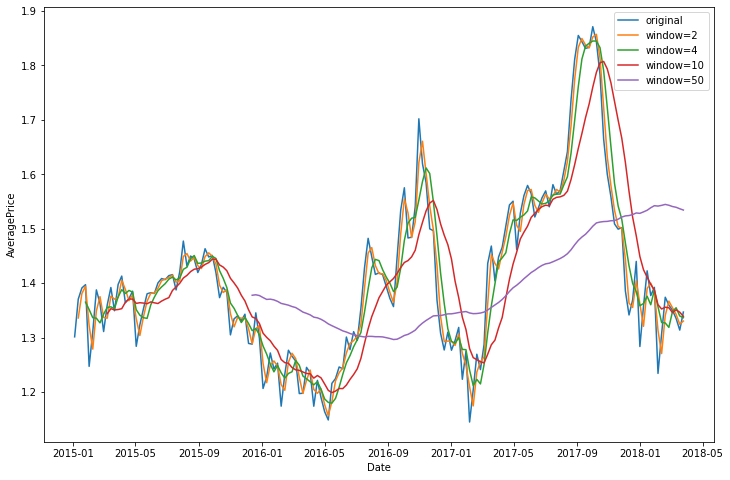

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.index,
             y=df.AveragePrice,
             label='original')
sns.lineplot(x=moving_avg(2).index,
             y=moving_avg(2).AveragePrice,
             label='window=2')
sns.lineplot(x=moving_avg(4).index,
             y=moving_avg(4).AveragePrice,
             label='window=4')
sns.lineplot(x=moving_avg(10).index,
             y=moving_avg(10).AveragePrice,
             label='window=10')
sns.lineplot(x=moving_avg(50).index,
             y=moving_avg(50).AveragePrice,
             label='window=50');

***
Calculate exponential moving average (apply parameter span=2 responsible for decay):

In [11]:
df \
    .ewm(span=2) \
    .mean()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758
...,...
2018-02-25,1.356212
2018-03-04,1.352194
2018-03-11,1.340793


In [12]:
df_full = pd.read_csv('avocado_full.csv', 
                      index_col='Date')

In [13]:
df_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [14]:
df_full.shape

(18249, 12)

In [15]:
df_full.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

For avocados of type `organic` (type) in `Chicago` (region), calculate a `moving average` with `window=4` and an `exponential moving average` with `span=4`. Build charts and then fill in the blanks.

In [16]:
mov_avg =df_full \
            .query('type == "organic" and region == "Chicago"') \
            .AveragePrice \
            .rolling(4) \
            .mean()    
mov_avg

Date
2015-01-04       NaN
2015-01-11       NaN
2015-01-18       NaN
2015-01-25    1.7300
2015-02-01    1.7375
               ...  
2018-02-25    1.6525
2018-03-04    1.6525
2018-03-11    1.6550
2018-03-18    1.6550
2018-03-25    1.6575
Name: AveragePrice, Length: 169, dtype: float64

In [17]:
ewm =df_full \
        .query('type == "organic" and region == "Chicago"') \
        .AveragePrice \
        .ewm(span=4) \
        .mean() 
ewm

Date
2015-01-04    1.490000
2015-01-11    1.677500
2015-01-18    1.745102
2015-01-25    1.784118
2015-02-01    1.669563
                ...   
2018-02-25    1.676654
2018-03-04    1.653992
2018-03-11    1.656395
2018-03-18    1.657837
2018-03-25    1.670702
Name: AveragePrice, Length: 169, dtype: float64

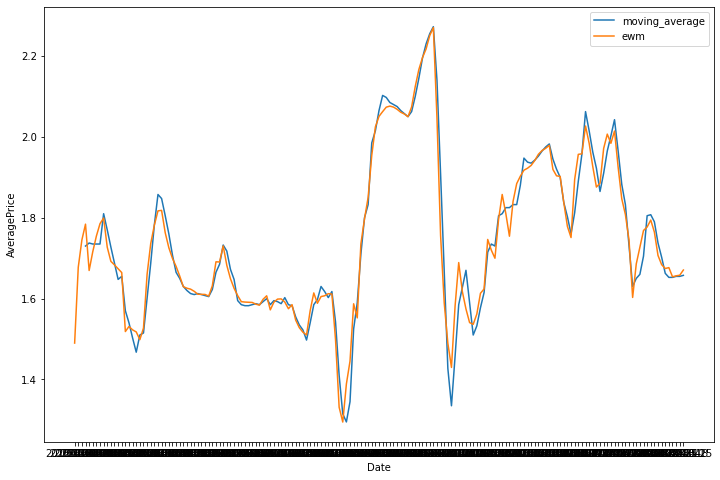

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=mov_avg, 
             label='moving_average')
sns.lineplot(data=ewm, 
             label='ewm');

***
Another dataset about delays on making deals, contains Information on which companies have made deals with whom and for what amount and how long they had been late:

In [19]:
df_delays = pd.read_csv('delays.csv')

In [20]:
df_delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [21]:
df_delays.shape

(264, 4)

In [22]:
df_delays.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

Convert column `delay` to `timedelta` format:

In [23]:
df_delays['delay'] = pd.to_timedelta(df_delays.delay.str.replace('-', ''))

In [24]:
df_delays.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

***
Let's turn the continuous variable time to nominative, break it down into categories:

In [25]:
bins = [pd.to_timedelta('0d'), 
        pd.to_timedelta('1d'),
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('100d')]

In [26]:
df_delays['delay_categorical'] = pd.cut(df_delays.delay, 
                                        bins=bins, 
                                        labels=['less than 1 day', '1 - 2 days', '2 - 3 days', 'more than 3 days'])

In [27]:
df_delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1 - 2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1 - 2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1 - 2 days
262,7203,5532,2 days 17:15:02,308979,2 - 3 days
